In [1]:
import cv2, numpy as np, os

In [2]:
#working_dir = '/home/stephen/Desktop/shapes/data/'
working_dir = 'E:\data science\data-set\shapes/'
os.chdir(working_dir)
img_size = 60 #size of image fed into model

def flatten(dimData, images):
    images = np.array(images)
    images = images.reshape(len(images), dimData)
    images = images.astype('float32')
    images /=255
    return images

In [3]:
#get data
folders, labels, images = ['triangle', 'star', 'square', 'circle'], [], []
for folder in folders:
    print(folder)
    for path in os.listdir(os.getcwd()+'/'+folder):
        img = cv2.imread(folder+'/'+path,0)
        #cv2.imshow('img', img)
        #cv2.waitKey(1)
        images.append(cv2.resize(img, (img_size, img_size)))
        labels.append(folders.index(folder))


triangle
star
square
circle


In [4]:
#break data into training and test sets
to_train= 0
train_images, test_images, train_labels, test_labels = [],[],[],[]
for image, label in zip(images, labels):
    if to_train<5:
        train_images.append(image)
        train_labels.append(label)
        to_train+=1
    else:
        test_images.append(image)
        test_labels.append(label)
        to_train = 0

In [5]:
#-----------------keras time --> make the model
from tensorflow.keras.utils import to_categorical

#flatten data
dataDim = np.prod(images[0].shape)
train_data  = flatten(dataDim, train_images)
test_data = flatten(dataDim, test_images)

In [6]:
#change labels to categorical
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [7]:
#determine the number of classes
classes = np.unique(train_labels)
nClasses  = len(classes)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
#three layers
#activation function: both
#neurons: 256
model = Sequential()
model.add(Dense(256, activation = 'tanh', input_shape = (dataDim,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nClasses, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size = 256, epochs=50, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

Epoch 1/50
49/49 [==============================] - 6s 79ms/step - loss: 1.4812 - accuracy: 0.2493 - val_loss: 1.3919 - val_accuracy: 0.2485
Epoch 2/50
49/49 [==============================] - 4s 73ms/step - loss: 1.3966 - accuracy: 0.2551 - val_loss: 1.3853 - val_accuracy: 0.2513
Epoch 3/50
49/49 [==============================] - 4s 72ms/step - loss: 1.3765 - accuracy: 0.2726 - val_loss: 1.4998 - val_accuracy: 0.2485
Epoch 4/50
49/49 [==============================] - 3s 71ms/step - loss: 0.9286 - accuracy: 0.4735 - val_loss: 0.6751 - val_accuracy: 0.5679
Epoch 5/50
49/49 [==============================] - 3s 71ms/step - loss: 0.7409 - accuracy: 0.5857 - val_loss: 0.6039 - val_accuracy: 0.6545
Epoch 6/50
49/49 [==============================] - 3s 52ms/step - loss: 0.6654 - accuracy: 0.6637 - val_loss: 0.5448 - val_accuracy: 0.6934
Epoch 7/50
49/49 [==============================] - 2s 42ms/step - loss: 0.5083 - accuracy: 0.7843 - val_loss: 0.2137 - val_accuracy: 0.9655
Epoch 8/50
49

In [9]:
#test model
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
#save model
model.save('E:\data science\data-set/')

78/78 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9984
Evaluation result on Test Data : Loss = 0.009507499635219574, accuracy = 0.9983968138694763
INFO:tensorflow:Assets written to: E:\data science\data-set/assets


In [10]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [11]:
import csv
data = ['loss']
file = open('g4g.csv', 'w+', newline ='')

with file:    
    write = csv.writer(file)
    write.writerows(data)

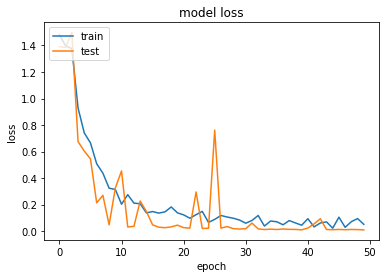

In [12]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

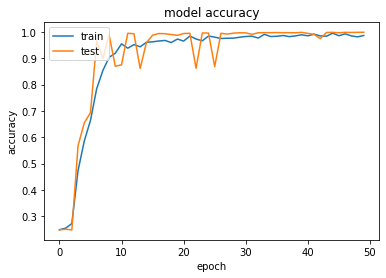

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

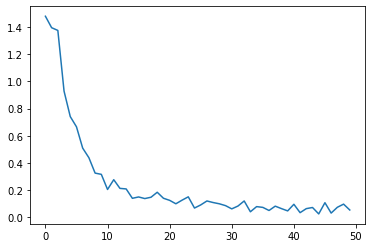

In [21]:
plt.plot(history.history['loss'])

In [22]:
history.history['loss']

[1.4811526536941528,
 1.3965702056884766,
 1.376549243927002,
 0.9285573363304138,
 0.740899384021759,
 0.6654332280158997,
 0.5082789063453674,
 0.4373454749584198,
 0.32390064001083374,
 0.31483104825019836,
 0.20321904122829437,
 0.27523162961006165,
 0.21122369170188904,
 0.2070963829755783,
 0.13797752559185028,
 0.14796897768974304,
 0.1360522359609604,
 0.1458558589220047,
 0.1826394945383072,
 0.13840873539447784,
 0.12288317084312439,
 0.09763073921203613,
 0.12433077394962311,
 0.14886493980884552,
 0.0661550760269165,
 0.08907774835824966,
 0.1183287650346756,
 0.1067938581109047,
 0.09751137346029282,
 0.08385995775461197,
 0.06004335731267929,
 0.08096872270107269,
 0.11828707903623581,
 0.038620688021183014,
 0.07672128081321716,
 0.07104015350341797,
 0.048139505088329315,
 0.08010322600603104,
 0.061963360756635666,
 0.04513431712985039,
 0.09386732429265976,
 0.032129719853401184,
 0.061810724437236786,
 0.0701361671090126,
 0.022821053862571716,
 0.105544313788414,
 0

In [23]:
history.history['val_loss']

[1.3919403553009033,
 1.3853185176849365,
 1.4997597932815552,
 0.6751251220703125,
 0.6039291024208069,
 0.544779896736145,
 0.21368691325187683,
 0.2703346014022827,
 0.04777594283223152,
 0.3253052532672882,
 0.45398902893066406,
 0.03188550844788551,
 0.03675457835197449,
 0.22753186523914337,
 0.14846429228782654,
 0.04772185534238815,
 0.03013451211154461,
 0.026246393099427223,
 0.03217441588640213,
 0.04544912651181221,
 0.026454728096723557,
 0.02284574881196022,
 0.29538455605506897,
 0.020395081490278244,
 0.022085225209593773,
 0.7618387937545776,
 0.02288689836859703,
 0.03483683988451958,
 0.018810447305440903,
 0.016217898577451706,
 0.018307700753211975,
 0.06087391451001167,
 0.01727190986275673,
 0.012406464666128159,
 0.015221192501485348,
 0.012585380114614964,
 0.016332203522324562,
 0.013651477172970772,
 0.01326380018144846,
 0.010067932307720184,
 0.02354498952627182,
 0.05495726689696312,
 0.09364093095064163,
 0.012553808279335499,
 0.011063364334404469,
 0.01

In [19]:
# Importing library
import csv
  
# data to be written row-wise in csv fil
data = [history.history['accuracy']]
  
# opening the csv file in 'w+' mode
file = open('uav-ML.csv', 'w+', newline ='')
  
# writing the data into the file
with file:    
    write = csv.writer(file)
    write.writerows(data)